# Explore enwiki-latest-category.sql

## TL;DR

This is step X toward the goal of:
- Get Wikipedia categories into database:
- (Create table simply linking page_id and top-level wikipedia category)

### Questions driving exploration:

- What is inside enwiki-latest-category.sql?
- How is it generally structured?

### Answers:

- **Headers and schema:**
    - from beginning of file
    - to row 40 (41st row)
- **Data:**
    - formatted as sql commands
    - from row 41 (42nd row)
    - to row 163 (164th row)
    - each row has ~10^6 characters
    - row 151 (152nd row) has less; the remainder
- **Footers:**
    - rows 152 through 163 have some footers

## Code

#### Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

#### Get lengths of the lines in the sql file

In [90]:
f = open(
    '../data/raw/enwiki-latest-category.sql', 
    mode='r', 
    encoding='UTF_8', 
    errors='backslashreplace')

d = {}
for i in range(165):
    x = f.readline()
    d[i] = len(x)

f.close()

In [91]:
s = pd.Series(d, name='line_lengths')

#### Peek at lengths of first few and last few lines

In [125]:
s.head(10)

0    76
1     3
2    41
3    58
4    38
5     1
6    66
7    68
8    66
9    31
Name: line_lengths, dtype: int64

In [126]:
s.tail(20)

145    1026254
146    1026442
147    1026548
148    1026107
149    1026405
150    1026529
151     142602
152         48
153         42
154          1
155         40
156         60
157         50
158         64
159         66
160         64
161         42
162          1
163         41
164          0
Name: line_lengths, dtype: int64

#### Look at line-numbers of the first few lines with lots of data

In [100]:
s[s > 10**5].head(4)

41    1016485
42    1020907
43    1022071
44    1021962
Name: line_lengths, dtype: int64

#### Look at a bar plot of the line lengths

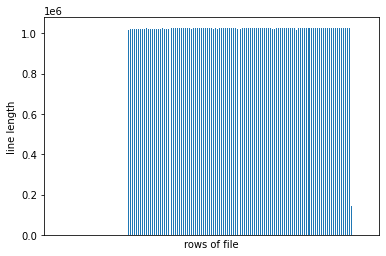

In [123]:
fig = plt.figure()
ax = plt.gca()
s.plot.bar(ax=ax)
ax.set_xticks([])
ax.set_xlabel('rows of file')
ax.set_ylabel('line length')
plt.show()